In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('employee_salary_dataset.csv')
df.head()

,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary
0,1,Employee_1,Marketing,15,Master,53,Female,Delhi,111416
1,2,Employee_2,Operations,7,Bachelor,25,Female,Bangalore,95271
2,3,Employee_3,IT,12,High School,51,Female,Hyderabad,69064
3,4,Employee_4,Operations,8,PhD,44,Male,Delhi,95091
4,5,Employee_5,Operations,15,Master,36,Female,Delhi,132450


In [15]:
df.describe()

,EmployeeID,Experience_Years,Age,Monthly_Salary
count,50.00000,50.000000,50.000000,50.0000
mean,25.50000,9.900000,39.760000,82288.8000
std,14.57738,5.349995,11.539745,33521.4379
min,1.00000,1.000000,22.000000,28420.0000
25%,13.25000,5.250000,28.250000,59424.0000
50%,25.50000,10.000000,43.500000,73890.5000
75%,37.75000,14.750000,49.000000,107219.0000
max,50.00000,19.000000,57.000000,149123.0000


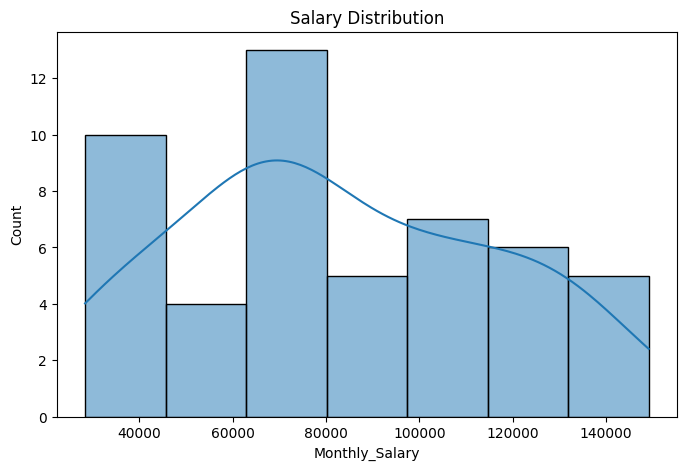

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df['Monthly_Salary'], kde=True)
plt.title('Salary Distribution')
plt.show()

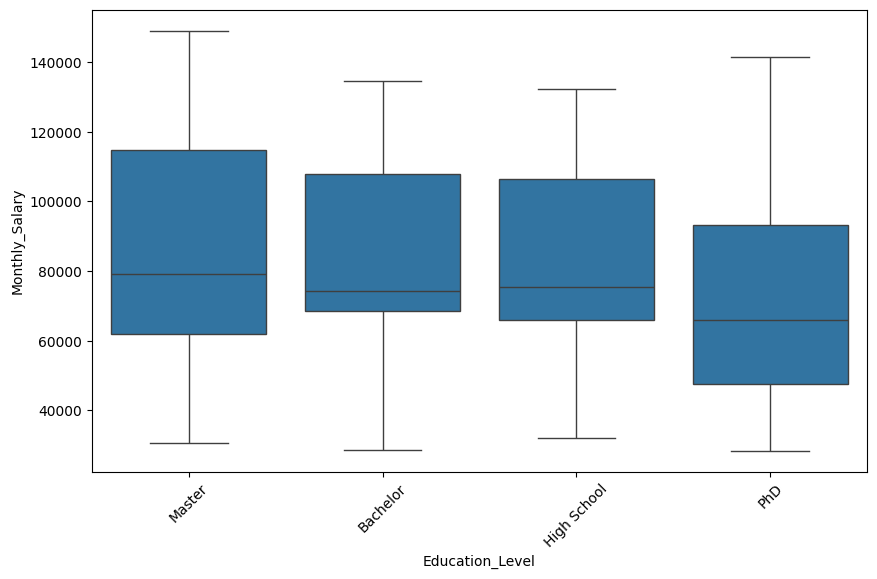

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Education_Level', y='Monthly_Salary', data=df)
plt.xticks(rotation=45)
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import pickle

In [22]:
X = df.drop('Monthly_Salary', axis=1)
y = df['Monthly_Salary']

cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocess = ColumnTransformer([
 ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

model = Pipeline([
 ('prep', preprocess),
 ('rf', RandomForestRegressor(n_estimators=150))
])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
print('Training Complete!')

Training Complete!


In [24]:
import sklearn.metrics as m
pred = model.predict(X_test)
print('MAE:', m.mean_absolute_error(y_test, pred))
print('RMSE:', m.mean_squared_error(y_test, pred, squared=False))
print('R2:', m.r2_score(y_test, pred))

MAE: 32532.190000000002
RMSE: 36097.031523178186
R2: -0.10513042464935163


C:\Users\unaid\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
pickle.dump(model, open('model.pkl','wb'))
print('Model saved!')

Model saved!
